In [2]:
#K Nearest
#the data set has hidden feature names, for privacy, we will use KNN to create model and predict 
#a class for a new data point based off of the feature

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
dataset = pd.read_csv("https://raw.githubusercontent.com/K-Nearest-Neighour/master/Classified%20Data")
dataset.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [3]:
#Lets Standarize the Data
#Because KNN Classifier predicts the class of a given test observation by identifying the observations..
#that are nearest to it, scaling is very important

In [4]:
from sklearn.preprocessing import StandardScaler


In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(dataset.drop('TARGET CLASS', axis = 1))


StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
scaled_features = scaler.transform(dataset.drop('TARGET CLASS', axis = 1))

In [10]:
df_feat = pd.DataFrame(scaled_features, columns = dataset.columns[:-1])
df_feat.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


/Users/riteshtripathi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Users/riteshtripathi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/riteshtripathi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/riteshtripathi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/riteshtripathi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

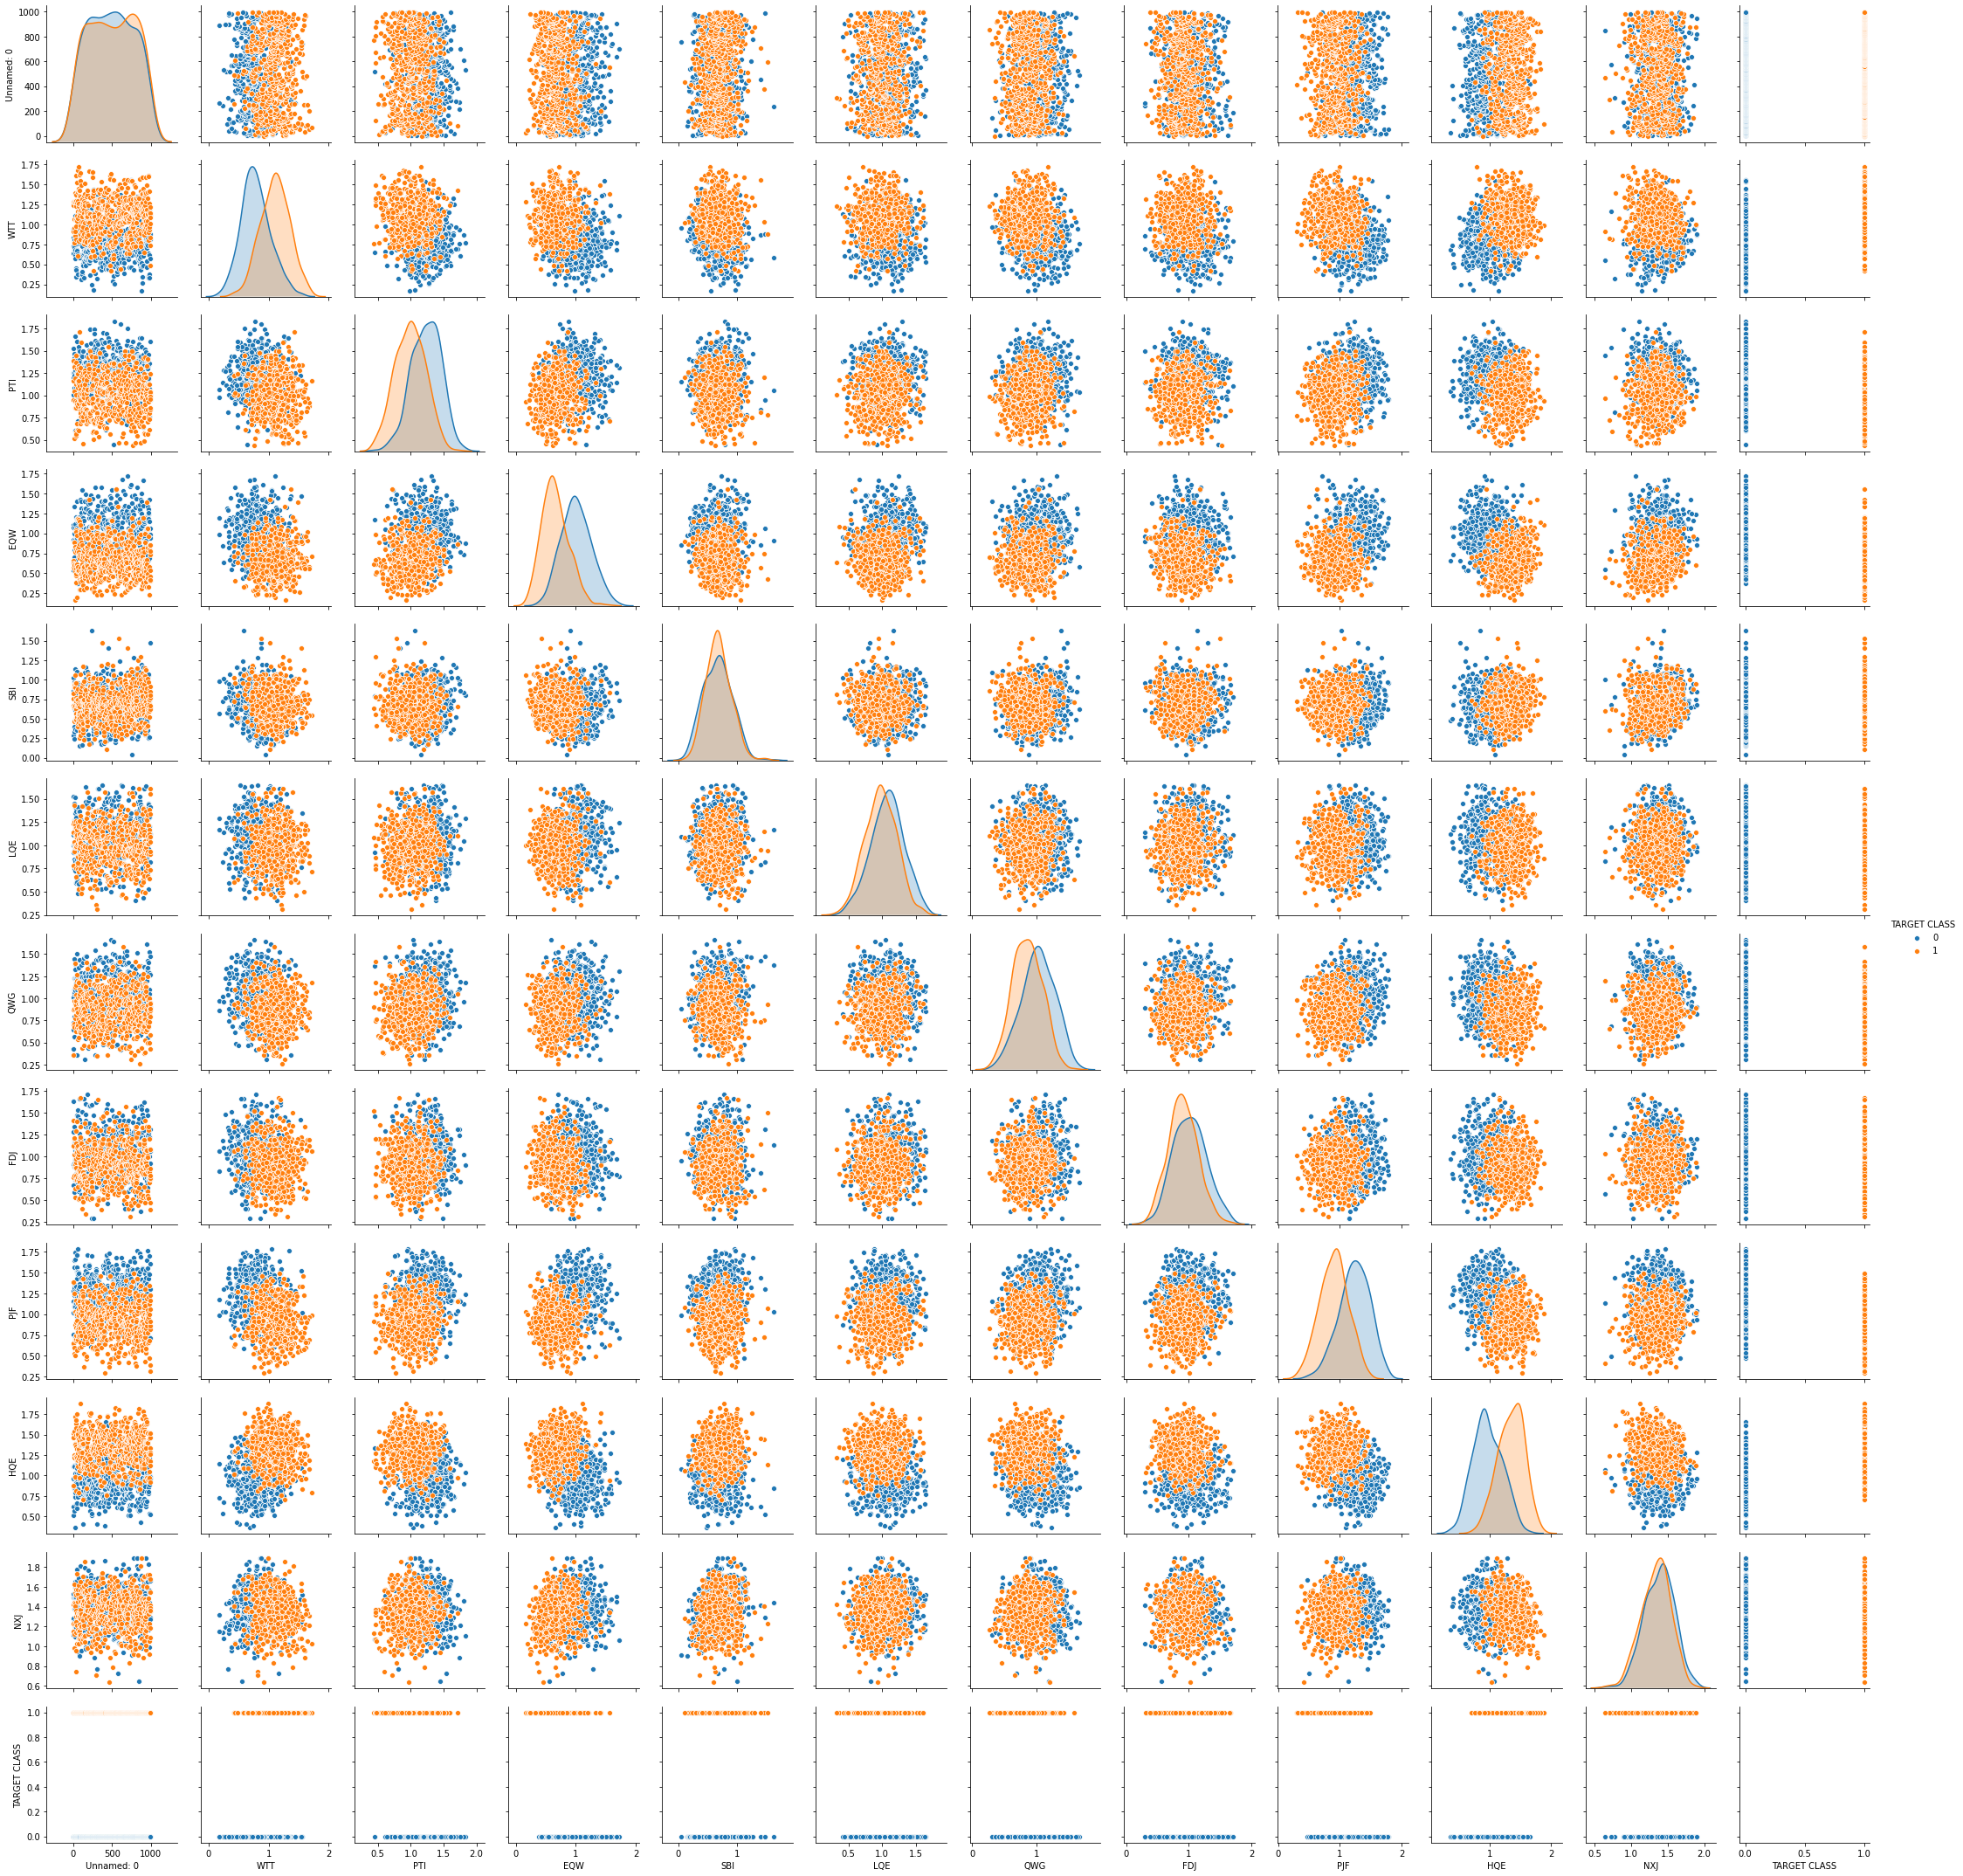

In [11]:
#since i have alot of features, lets look at the pair plot of the distribution
import seaborn as sns
sns.pairplot(dataset, hue = 'TARGET CLASS')

In [ ]:
#there is alot of overlapping, i cant apply logistic and Decision as it will take alot of time
#therefore i will use K nearest

In [12]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, dataset['TARGET CLASS'],
                                                   test_size = 0.30)
#we will use split and then will use cross validation


In [13]:
#Using KNN
#Remember that we are trying to come up with a model to predict whether someone wil TARGET CLASS or not.
#we will start k = 1
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)

In [15]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [16]:
pred = knn.predict(X_test)

In [17]:
#Now after doing the fit of model, we find:
#Predictions and Evaluations
#lets evaluate our KNN model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


In [18]:
print(confusion_matrix(y_test, pred))

[[141   9]
 [ 11 139]]


In [19]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       150
           1       0.94      0.93      0.93       150

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [28]:
#Since my K Value is just 1, it will lead to underfitting, therefore i have to choose the best k value
#lets use the elbow method to pick a good k Vlaue
accuracy_rate = []

for i in range(1,40):#i will see what accruacy i get for k =1, k=2..and so on
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, df_feat, dataset['TARGET CLASS'], cv = 10)
    accuracy_rate.append(score.mean())
#and then i will plot accuracy rate and see where the accuracy rate is stable
#for 10 different datasets, internally wil happen

In [24]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, df_feat, dataset['TARGET CLASS'], cv = 10)
    error_rate.append(1-score.mean())
    

In [26]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
#i can either use acccuracy rate or error rate

Text(0, 0.5, 'Error Rate')

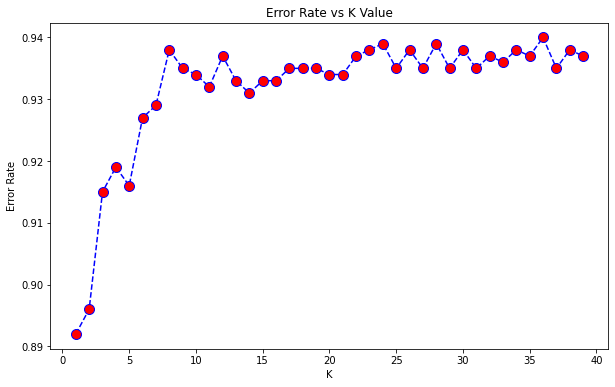

In [30]:
plt.figure(figsize = (10, 6))
#plt.plot(range(1,40), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o',
        #markerfacecolor = 'red', markersize = 10)
plt.plot(range(1,40), accuracy_rate, color = 'blue', linestyle = 'dashed', marker = 'o',
        markerfacecolor = 'red', markersize = 10)
plt.title("Error Rate vs K Value")
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
#we have to see the error rate or accuracy rate was continously stable at a specific point
#we see at k 23, points have been stable, with error rate of 0.935

In [31]:
#Now with k = 23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('With k = 23')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

With k = 23


[[140  10]
 [  4 146]]


              precision    recall  f1-score   support

           0       0.97      0.93      0.95       150
           1       0.94      0.97      0.95       150

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

